In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

SNR_dB = list(range(0, 25, 5))
y_lim_angle = [.003,1]
y_lim_range = [0, 3]
x_lim = [min(SNR_dB),max(SNR_dB)]

In [127]:
sigma_n = 1 / np.sqrt(1)
range_limits = [1,10]
n_snapshots = 10
from utils import CN_realization
N = 128
f0 = 25e9                   # carrier frequency
k = 2*np.pi / (3e8 / f0)    # wave number
d = 3e8/f0 / 2              # antenna spacing

delta = lambda n: (2*n - N + 1)/2

# near-field array response vector (parabolic wavefront approximation)
a = lambda theta, r: np.array([np.exp(-1j*k*(np.sqrt(r**2 + delta(n)**2*d**2 - 2*r*theta*delta(n)*d) - r)) for n in range(N)]).T

y_snap = []

for s in range(n_snapshots):
    s = 1
    n = CN_realization(mean=0, std_dev=sigma_n, size=N)

    r = np.random.uniform(range_limits[0], range_limits[1])
    r_norm = 2 * (r - range_limits[0]) / (range_limits[1] - range_limits[0]) - 1
    theta = np.random.uniform(-90,90)
    theta = np.sin(np.deg2rad(theta))
    # theta = np.random.uniform(-1,1)

    # uplink received signal
    y_ = a(theta,r) * s + n
    y = np.concatenate((y_.real, y_.imag))
    y_snap.append(y)
y_final = np.stack(y_snap)
print(y_final.shape)

(10, 256)


In [105]:
a = np.load('./dataset/polar_uniform_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/polar_r_theta_uniform_100k.npy',allow_pickle=True).item()

In [114]:
x, y = a[0]['y']
print(x,y)
x_true = x_lim[0] + x*(x_lim[1] - x_lim[0]) # de-scaling
y_true = y_lim[0] + y*(y_lim[1] - y_lim[0])
print(x_true,y_true)
theta = np.arctan2(y_true,x_true)
r = np.sqrt(x_true**2 + y_true**2)
print(r,theta/np.pi*180)

0.3559726786512616 0.7578461104643691
-1.4402732134873841 7.602676493597254
7.737898732587906 100.72715756115711


In [187]:
p = np.random.uniform(low=0,high=10,size=(2,)) - [5,0]
p

array([-0.27243277,  5.23391529])

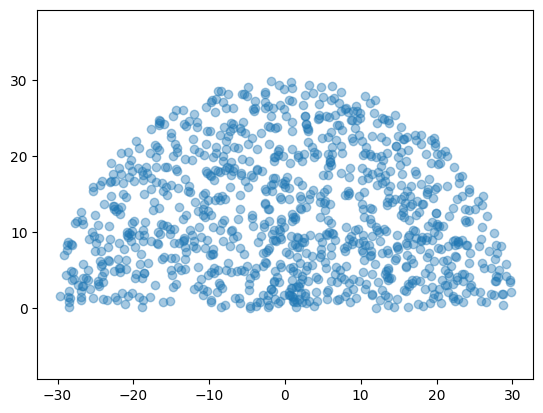

In [175]:
def range_angle_from_net_output(y_hat,r_lim):
    r = r_lim[0] + (y_hat[1] + 1)/2 * (r_lim[1] - r_lim[0])
    angle_rad = np.arcsin(y_hat[0])
    angle_deg = angle_rad * 180/np.pi
    return [r, angle_rad, angle_deg]

range_limits = [1,30]
n_pts = 1000
x_ = []
y_ = []
a = np.load('./dataset/polar_uniform_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/polar_r_theta_uniform_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/positive_theta_30m_28GHz_256N_1k.npy',allow_pickle=True).item()
# a = np.load('./dataset/polar_uniform_256N_30GHz_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/30GHz_multipath_256N_1k.npy',allow_pickle=True).item()
for i in range(n_pts):
    # r = np.random.uniform(range_limits[0], range_limits[1])
    theta, r = a[i]['y']
    r = range_limits[0] + (r + 1)/2 * (range_limits[1] - range_limits[0])
    # theta = np.random.uniform(-90,90)
    # theta = np.sin(np.deg2rad(theta))
    y_.append(r * np.sqrt(1 - theta**2))
    x_.append(r * theta)

plt.scatter(x_,y_,alpha=0.4)
plt.axis('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

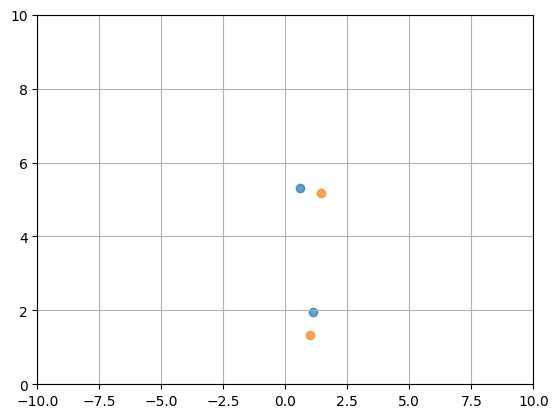

<Figure size 640x480 with 0 Axes>

In [232]:
r_lim = [1,10]
n_pts = 3
x_ = []
y_ = []
r_, theta_ = [], []
for i in range(n_pts):
    # theta, r = a[i]['y']
    p = np.random.uniform(low=0,high=20,size=(2,)) - [10,0]
    r =  np.linalg.norm(p)
    # theta = np.sin(np.arctan2(p[1],p[0]))
    r_scat = np.random.uniform(0,1.5)
    theta_scat = np.random.uniform(0,2*np.pi)

    x1 = p[0] + r_scat * np.cos(theta_scat)
    y1 = p[1] + r_scat * np.sin(theta_scat)
    r_scat = np.linalg.norm([x1,y1])
    
    if r > r_lim[0] and r < r_lim[1]:
        x_.append(p[0])
        y_.append(p[1])
        r_.append(x1)
        theta_.append(y1)

plt.scatter(x_,y_,alpha=0.7)
plt.scatter(r_,theta_,alpha=0.7)
plt.grid()
plt.xlim([-10,10])
plt.ylim([0,10])
plt.figure()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

range_limits = [1,10]
n_pts = 1000
x_ = []
y_ = []

center = [-2,2]
half_length = 1
for i in range(n_pts):
    r = np.random.uniform(range_limits[0], range_limits[1])
    theta = np.random.uniform(-90,90)
    theta = np.sin(np.deg2rad(theta))
    y_.append(r * np.sqrt(1 - theta**2))
    x_.append(r * theta)

    r1 = np.random.uniform(1.5, 4.5)
    theta1 = np.random.uniform(np.sin(np.deg2rad(-45)-1),np.sin(np.deg2rad(-45)+1)) # 1 radiant
    y1.append(r1 * np.sqrt(1 - theta1**2))
    x1.append(r1 * theta1)

    x2.append(np.random.uniform(center[0]-half_length,center[0]+half_length))
    y2.append(np.random.uniform(center[1]-half_length,center[1]+half_length))


    

plt.scatter(x_,y_)
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='k')
plt.show()

In [52]:
def range_angle_from_net_output(y_hat,r_lim):
    r = r_lim[0] + (y_hat[1] + 1)/2 * (r_lim[1] - r_lim[0])
    angle_rad = np.arcsin(y_hat[0])
    angle_deg = angle_rad * 180/np.pi
    return [r, angle_rad, angle_deg]

def dnn_output_to_near_field_components(batch_y,batch_y_hat,r_lim):
    # convert DNN output to range and angle
    [r_pred, _, theta_pred] = range_angle_from_net_output(batch_y_hat[[0,2]],r_lim)
    [r, _, theta] = range_angle_from_net_output(batch_y[[0,2]],r_lim)
    [r_scat_pred, _, theta_scat_pred] = range_angle_from_net_output(batch_y_hat[[1,3]],r_lim) # multipath component
    [r_scat, _, theta_scat] = range_angle_from_net_output(batch_y[[1,3]],r_lim)

    # from polar coordinate to cartesian coordinates (near-field source + near-field scatterer)
    sin_theta = batch_y[0]
    sin_theta_scat = batch_y[1]
    sin_theta_pred = batch_y_hat[0]
    sin_theta_scat_pred = batch_y_hat[1]
    p_true = np.stack((r*np.sqrt(1-sin_theta**2),r*sin_theta),axis=-1)
    p_scat_true = np.stack((r_scat*np.sqrt(1-sin_theta_scat**2),r_scat*sin_theta_scat),axis=-1) # x = r*cos(theta), y = r*sin(theta)
    p_pred = np.stack((r*np.sqrt(1-sin_theta_pred**2),r_pred*sin_theta_pred),axis=-1)
    p_scat_pred = np.stack((r_scat_pred*np.sqrt(1-sin_theta_scat_pred**2),r_scat_pred*sin_theta_scat_pred),axis=-1)
    return r, r_pred, r_scat, r_scat_pred, theta, theta_pred, theta_scat, theta_scat_pred, p_true, p_pred, p_scat_true, p_scat_pred

a = np.load('./dataset/dataset_scat_loc_3x3_5m_100k.npy',allow_pickle=True).item()

for i in range(10):
    theta, theta_scat, r, r_scat = a[i]['y']
    # print('theta, theta_scat, r, r_scat')
    print(a[i]['y'])
    # print(theta, theta_scat)
    # print(np.arcsin(theta)/np.pi*180,np.arcsin(theta_scat)/np.pi*180)
    r, r_pred, r_scat, r_scat_pred, theta, theta_pred, theta_scat, theta_scat_pred, p_true, p_pred, p_scat_true, p_scat_pred = dnn_output_to_near_field_components(a[i]['y'],a[i]['y'],[1,10])
    print(theta,theta_scat,r,r_scat)


[-0.90799472 -0.92859319 -0.97121302 -0.57589104]
-65.22969057003833 -68.21656994031002 1.1295413976678028 2.9084903234216846
[ 0.85875198 -0.31450246 -0.65822483  0.25296483]
59.176742555814954 -18.330780659291634 2.5379882865105925 6.638341734489909
[ 0.90047471 -0.44630562  0.83462715 -0.54477205]
64.22053576118564 -26.50690206986584 9.255822179160186 3.0485257587029895
[ 0.73406299 -0.28842614  0.97529913 -0.68983621]
47.228099366269824 -16.763754754086882 9.88884607362452 2.3957370420342565
[ 0.58006087 -0.61448709  0.73611338  0.4588881 ]
35.45482420820418 -37.91466097128517 8.812510210967055 7.564996450793943
[-0.9327728  -0.90250272 -0.86926768 -0.01864321]
-68.87125353318542 -64.48901374409125 1.588295418079467 5.416105557295344
[-0.83963997 -0.55487645  0.5023561  -0.6434885 ]
-57.10212104323562 -33.70220504584726 7.760602430275762 2.6043017355994746
[-0.58223455 -0.53829247 -0.13454173 -0.06345059]
-35.60786308718186 -32.56747568594743 4.894562224177342 5.214472334825234
[-0

### Load all the results

In [7]:
csv_filename = 'test_rmse.csv' # 'test_rmse.csv', or 'best_rmse_epoch.csv'

# varying beamformer architecture
model_path = 'saved_models/single_user/hyb_configs/'
DNN_hyb_fully_RF16_eq = pd.read_csv(model_path+'fully-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq_dnn/'+csv_filename)
CNN_hyb_fully_RF16_eq = pd.read_csv(model_path+'fully-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/'+csv_filename)
CNN_hyb_sub_RF16_eq = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/'+csv_filename)
CNN_hyb_inter_RF16_eq = pd.read_csv(model_path+'inter-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/'+csv_filename)

# varying the number of RF CHAINS N_RF
model_path = 'saved_models/single_user/N_RF/'
CNN_sub_8RF_eq = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_8RF_128N_dropout01_eq/'+csv_filename)
CNN_sub_16RF_eq = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/'+csv_filename)
CNN_sub_32RF_eq = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_32RF_128N_dropout01_eq/'+csv_filename)
CNN_sub_64RF_eq = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_64RF_128N_dropout01_eq/'+csv_filename)
# CNN_sub_128RF_eq = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_128RF_128N_dropout01_eq/'+csv_filename)
# CNN_hyb_fully_RF64_equalized = pd.read_csv('saved_models/single_user/better_than_dnn/fully-connected_epochs80_batch256_lr0.001_64RF_128N_conv2_dropout_equalized_w/'+csv_filename)


# MULTIPATH: estimation of (theta,r) of the source, and (theta_scat,r_scat) of a scatterer (simulating the strongest component of multipath)
model_path = 'saved_models/single_user/multipath/'
multipath_CNN_sub_N128_RF8 = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_8RF_128N_scat_CN/'+csv_filename)
multipath_CNN_sub_N128_RF16 = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_16RF_128N_scat_CN/'+csv_filename)
multipath_CNN_sub_N128_RF32 = pd.read_csv(model_path+'sub-connected_epochs50_batch256_lr0.001_32RF_128N_scat_CN/'+csv_filename)
multipath_CNN_inter_N128_RF16 = pd.read_csv(model_path+'inter-connected_epochs50_batch256_lr0.001_16RF_128N_scat_CN/'+csv_filename)
multipath_CNN_inter_N128_RF32 = pd.read_csv(model_path+'inter-connected_epochs50_batch256_lr0.001_32RF_128N_scat_CN/'+csv_filename)

# fully-digital (maximum likelihood)
model_path = 'saved_models/maximum_likelihood/'
# N = 64 antennas
maximum_likelihood_N64_rmse_r = np.load(model_path + 'rmse_r_N64_128_10.npy')
maximum_likelihood_N64_rmse_theta_deg = np.load(model_path + 'rmse_theta_deg_N64_128_10.npy')
maximum_likelihood_N64_rmse_theta_rad = np.load(model_path + 'rmse_theta_rad_N64_128_10.npy')
maximum_likelihood_N64_rmse_pos = np.load(model_path + 'rmse_pos_N64_128_10.npy')
# N = 128 antennas
maximum_likelihood_N128_rmse_r = np.load(model_path + 'rmse_r_N128_128_10.npy')
maximum_likelihood_N128_rmse_theta_deg = np.load(model_path + 'rmse_theta_deg_N128_128_10.npy')
maximum_likelihood_N128_rmse_theta_rad = np.load(model_path + 'rmse_theta_rad_N128_128_10.npy')
maximum_likelihood_N128_rmse_pos = np.load(model_path + 'rmse_pos_N128_128_10.npy')
# rmse_ML = pd.read_csv(model_path + 'rmse_ML_N128_128_50.csv')

# Hybrid Beamforming Configurations
Fully-connected, Sub-connected, Inter-connected

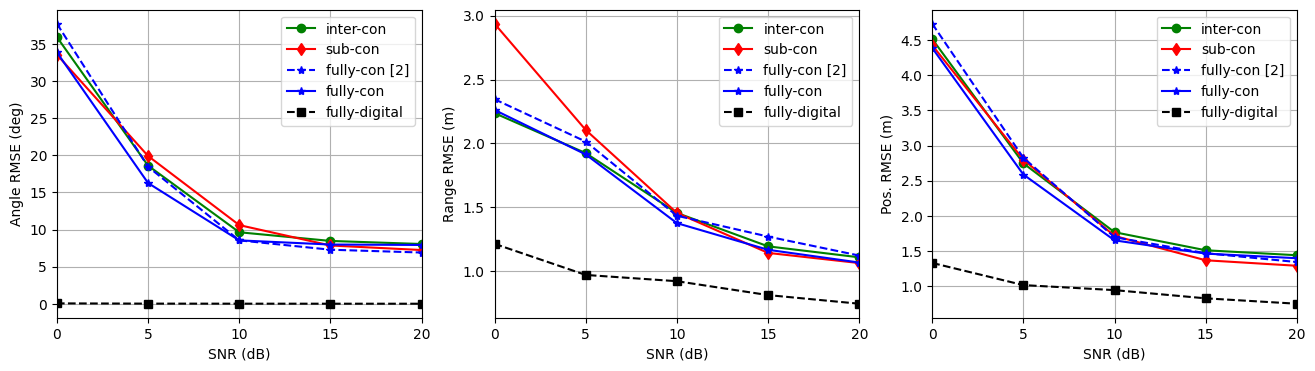

In [8]:
plt.figure(figsize=(16,4))
plt.subplot(132)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,CNN_hyb_inter_RF16_eq['Test (r)'],'-og',label='inter-con')
plt.plot(SNR_dB,CNN_hyb_sub_RF16_eq['Test (r)'],'-dr',label='sub-con')
plt.plot(SNR_dB,DNN_hyb_fully_RF16_eq['Test (r)'],'--*b',label='fully-con [2]')
plt.plot(SNR_dB,CNN_hyb_fully_RF16_eq['Test (r)'],'-*b',label='fully-con')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'--sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,CNN_hyb_inter_RF16_eq['Test (theta)'],'-og',label='inter-con')
plt.plot(SNR_dB,CNN_hyb_sub_RF16_eq['Test (theta)'],'-dr',label='sub-con')
plt.plot(SNR_dB,DNN_hyb_fully_RF16_eq['Test (theta)'],'--*b',label='fully-con [2]')
plt.plot(SNR_dB,CNN_hyb_fully_RF16_eq['Test (theta)'],'-*b',label='fully-con')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_rad,'--sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.yscale('log')
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE (deg)')
plt.legend()

# RMSE POSITION
plt.subplot(133)
plt.plot(SNR_dB,CNN_hyb_inter_RF16_eq['Test (pos)'],'-og',label='inter-con')
plt.plot(SNR_dB,CNN_hyb_sub_RF16_eq['Test (pos)'],'-dr',label='sub-con')
plt.plot(SNR_dB,DNN_hyb_fully_RF16_eq['Test (pos)'],'--*b',label='fully-con [2]')
plt.plot(SNR_dB,CNN_hyb_fully_RF16_eq['Test (pos)'],'-*b',label='fully-con')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'--sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.yscale('log')
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
# plt.grid(True,which='both')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.show()

In [9]:
DNN = DNN_hyb_fully_RF16_eq['Test (pos)'].values.mean()
CNN = CNN_hyb_fully_RF16_eq['Test (pos)'].values.mean()
print(DNN_hyb_fully_RF16_eq['Test (pos)'].values,'\n',CNN_hyb_fully_RF16_eq['Test (pos)'].values)

print(f'Relative position localization error: {(DNN - CNN)/DNN * 100:.2f} %')

[4.73194289 2.82588445 1.6959203  1.468228   1.34235242] 
 [4.38774545 2.5871721  1.65107783 1.46246966 1.39710123]
Relative position localization error: 4.80 %


# Varying N_RF RF CHAINS

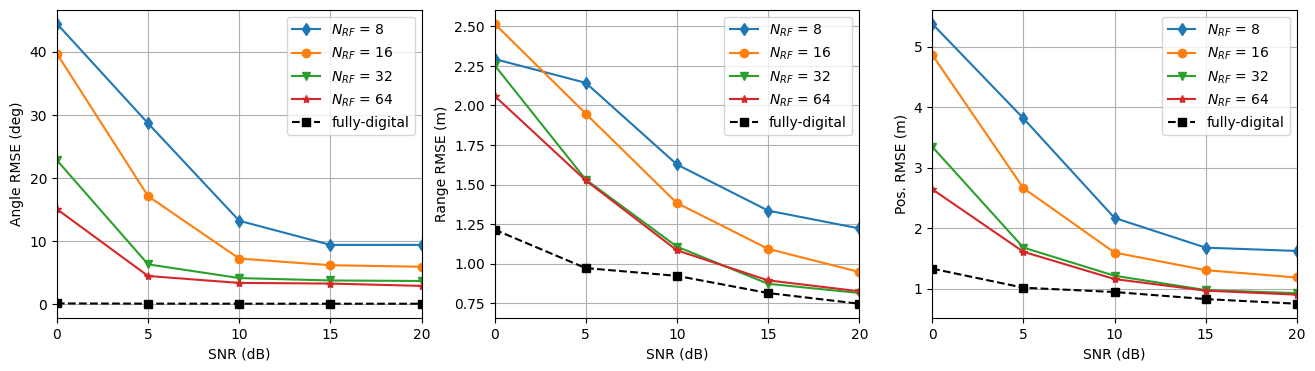

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.plot(SNR_dB,CNN_sub_8RF_eq['Test (r)'],'-d',    label=r'$N_{RF}$ = 8')
plt.plot(SNR_dB,CNN_sub_16RF_eq['Test (r)'],'-o',   label=r'$N_{RF}$ = 16')
plt.plot(SNR_dB,CNN_sub_32RF_eq['Test (r)'],'-v',   label=r'$N_{RF}$ = 32')
plt.plot(SNR_dB,CNN_sub_64RF_eq['Test (r)'],'-*',   label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,CNN_sub_128RF_eq['Test (r)'],'-x',   label=r'$N_{RF}$ = 128')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'--sk',label=r'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

plt.subplot(131)
plt.plot(SNR_dB,CNN_sub_8RF_eq['Test (theta)'],'-d',    label=r'$N_{RF}$ = 8')
plt.plot(SNR_dB,CNN_sub_16RF_eq['Test (theta)'],'-o',   label=r'$N_{RF}$ = 16')
plt.plot(SNR_dB,CNN_sub_32RF_eq['Test (theta)'],'-v',   label=r'$N_{RF}$ = 32')
plt.plot(SNR_dB,CNN_sub_64RF_eq['Test (theta)'],'-*',   label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,CNN_sub_128RF_eq['Test (theta)'],'-x',   label=r'$N_{RF}$ = 128')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_rad,'--sk',label=r'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
# plt.yscale('log')
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE (deg)')
plt.legend()

# RMSE POSITION
plt.subplot(133)
plt.plot(SNR_dB,CNN_sub_8RF_eq['Test (pos)'],'-d',    label=r'$N_{RF}$ = 8')
plt.plot(SNR_dB,CNN_sub_16RF_eq['Test (pos)'],'-o',   label=r'$N_{RF}$ = 16')
plt.plot(SNR_dB,CNN_sub_32RF_eq['Test (pos)'],'-v',   label=r'$N_{RF}$ = 32')
plt.plot(SNR_dB,CNN_sub_64RF_eq['Test (pos)'],'-*',   label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,CNN_sub_128RF_eq['Test (pos)'],'-x',   label=r'$N_{RF}$ = 128')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'--sk',label=r'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.show()

# Multipath
Compared to the previous setup, we further consider a scenario where the ...

We consider the effect of multipath through an additional scatterer, simulating the strongest component of the multipath.

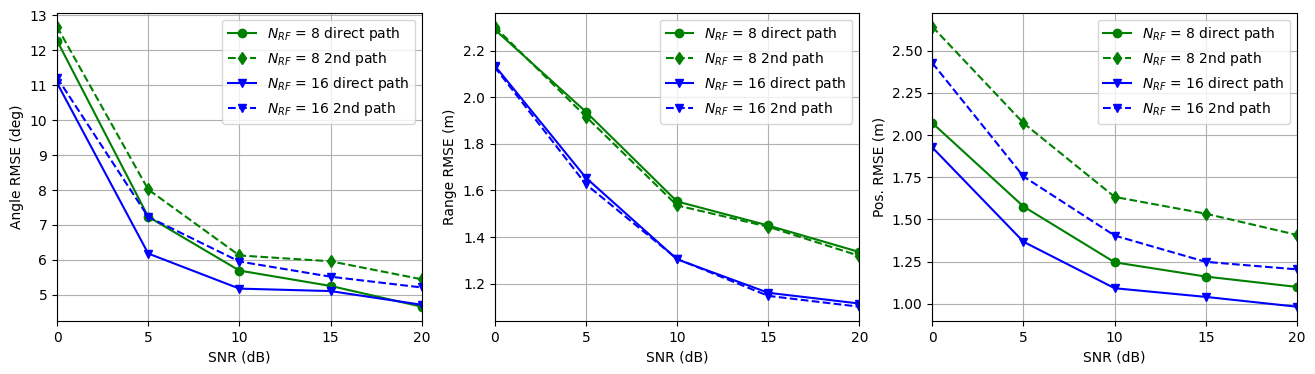

In [249]:
plt.figure(figsize=(16,4))
plt.subplot(132)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-dr',label='sub-con')
# plt.plot(SNR_dB,multipath_CNN_1x1_10m_N128_RF16['Test (r)'],'-ob',label='direct path 1x1')
# plt.plot(SNR_dB,multipath_CNN_1x1_10m_N128_RF16['Test (r_scat)'],'--db',label='2nd path 1x1')
# plt.plot(SNR_dB,multipath_CNN_3x3_10m_N128_RF16['Test (r)'],'-or',label='direct path 3x3')
# plt.plot(SNR_dB,multipath_CNN_3x3_10m_N128_RF16['Test (r_scat)'],'--dr',label='2nd path 3x3')
# plt.plot(SNR_dB,multipath_CNN_near_ue_N128_RF16['Test (r)'],'-og',label='direct path')
# plt.plot(SNR_dB,multipath_CNN_near_ue_N128_RF16['Test (r_scat)'],'--dg',label='2nd path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF8['Test (r)'],'-og',label=r'$N_{RF}$ = 8 direct path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF8['Test (r_scat)'],'--dg',label=r'$N_{RF}$ = 8 2nd path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF16['Test (r)'],'-vb',label=r'$N_{RF}$ = 16 direct path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF16['Test (r_scat)'],'--vb',label=r'$N_{RF}$ = 16 2nd path')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_r,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')

# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',label='sub-con')
# plt.plot(SNR_dB,np.sin(multipath_CNN_1x1_10m_N128_RF16['Test (theta)']/180*np.pi),'-ob',label='direct path 1x1')
# plt.plot(SNR_dB,np.sin(multipath_CNN_1x1_10m_N128_RF16['Test (theta_scat)']/180*np.pi),'--db',label='2nd path 1x1')
# plt.plot(SNR_dB,np.sin(multipath_CNN_3x3_10m_N128_RF16['Test (theta)']/180*np.pi),'-or',label='direct path 3x3')
# plt.plot(SNR_dB,np.sin(multipath_CNN_3x3_10m_N128_RF16['Test (theta_scat)']/180*np.pi),'--dr',label='2nd path 3x3')
# plt.plot(SNR_dB,multipath_CNN_near_ue_N128_RF16['Test (theta)'],'-og',label='direct path')
# plt.plot(SNR_dB,multipath_CNN_near_ue_N128_RF16['Test (theta_scat)'],'--dg',label='2nd path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF8['Test (theta)'],'-og',label=r'$N_{RF}$ = 8 direct path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF8['Test (theta_scat)'],'--dg',label=r'$N_{RF}$ = 8 2nd path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF16['Test (theta)'],'-vb',label=r'$N_{RF}$ = 16 direct path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF16['Test (theta_scat)'],'--vb',label=r'$N_{RF}$ = 16 2nd path')
# plt.plot(SNR_dB, np.sin(maximum_likelihood_N64_rmse_theta_rad),'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.yscale('log')
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE (deg)')
plt.legend()

# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (theta)'],'-og',label='user')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (theta_scat)'],'-dr',label='multipath component')
# plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_deg,'-sk',label=f'fully-digital')
# plt.xticks(SNR_dB)
# # plt.yscale('log')
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'RMSE ($\theta$)')
# plt.legend()

plt.subplot(133)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-dr',label='sub-con')
# plt.plot(SNR_dB,multipath_CNN_1x1_10m_N128_RF16['Test (pos)'],'-ob',label='direct path 1x1')
# plt.plot(SNR_dB,multipath_CNN_1x1_10m_N128_RF16['Test (pos_scat)'],'--db',label='2nd path 1x1')
# plt.plot(SNR_dB,multipath_CNN_3x3_10m_N128_RF16['Test (pos)'],'-or',label='direct path 3x3')
# plt.plot(SNR_dB,multipath_CNN_3x3_10m_N128_RF16['Test (pos_scat)'],'--dr',label='2nd path 3x3')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF8['Test (pos)'],'-og',label=r'$N_{RF}$ = 8 direct path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF8['Test (pos_scat)'],'--dg',label=r'$N_{RF}$ = 8 2nd path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF16['Test (pos)'],'-vb',label=r'$N_{RF}$ = 16 direct path')
plt.plot(SNR_dB,multipath_CNN_near_ue_uniform_N128_RF16['Test (pos_scat)'],'--vb',label=r'$N_{RF}$ = 16 2nd path')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_pos,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.grid()
plt.show()

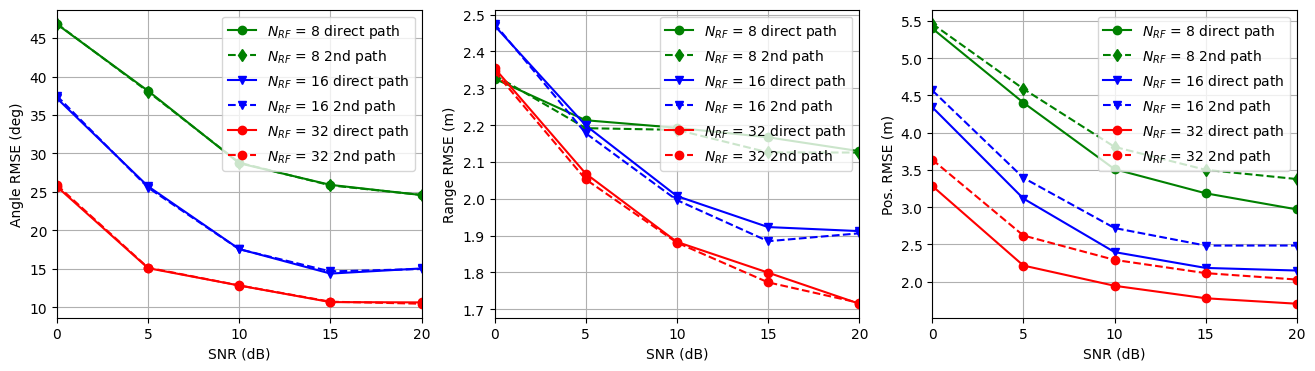

In [15]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF8['Test (r)'],'-og',label=r'$N_{RF}$ = 8 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF8['Test (r_scat)'],'--dg',label=r'$N_{RF}$ = 8 2nd path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF16['Test (r)'],'-vb',label=r'$N_{RF}$ = 16 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF16['Test (r_scat)'],'--vb',label=r'$N_{RF}$ = 16 2nd path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF32['Test (r)'],'-ro',label=r'$N_{RF}$ = 32 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF32['Test (r_scat)'],'--ro',label=r'$N_{RF}$ = 32 2nd path')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_r,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF8['Test (theta)'],'-og',label=r'$N_{RF}$ = 8 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF8['Test (theta_scat)'],'--dg',label=r'$N_{RF}$ = 8 2nd path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF16['Test (theta)'],'-vb',label=r'$N_{RF}$ = 16 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF16['Test (theta_scat)'],'--vb',label=r'$N_{RF}$ = 16 2nd path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF32['Test (theta)'],'-ro',label=r'$N_{RF}$ = 32 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF32['Test (theta_scat)'],'--ro',label=r'$N_{RF}$ = 32 2nd path')
# plt.plot(SNR_dB, np.sin(maximum_likelihood_N64_rmse_theta_rad),'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.yscale('log')
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE (deg)')
plt.legend()

plt.subplot(133)
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF8['Test (pos)'],'-og',label=r'$N_{RF}$ = 8 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF8['Test (pos_scat)'],'--dg',label=r'$N_{RF}$ = 8 2nd path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF16['Test (pos)'],'-vb',label=r'$N_{RF}$ = 16 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF16['Test (pos_scat)'],'--vb',label=r'$N_{RF}$ = 16 2nd path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF32['Test (pos)'],'-ro',label=r'$N_{RF}$ = 32 direct path')
plt.plot(SNR_dB,multipath_CNN_sub_N128_RF32['Test (pos_scat)'],'--ro',label=r'$N_{RF}$ = 32 2nd path')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_pos,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.grid()
plt.show()